**Name**: Aminu idris

**Fellow ID**: FE/23/97619690

**State**: Kogi

**Cohort**: Two

**Learning Track**: Data Science


# **Climate Impacts on Nigeria's Agriculture & Economy**
# Introduction
This project focuses on analyzing the relationship between weather variables, agricultural production, and economic indicators in Nigeria from 1950 to 2023. We will explore data preprocessing, statistical modeling, and forecasting using techniques such as Multiple Linear Regression, ARIMA, and Vector Autoregression (VAR).


# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR


# Set visualization style
sns.set(style="whitegrid")

# Loading and Exploring the Dataset
In this section, we load the dataset and perform initial exploration to understand the structure and contents.


In [2]:
# Load the dataset with the correct file name

cinae = pd.read_csv("nigeria_agricultural_economic_indicators_1950_2023.csv")
cinae

,year,avg_temp_c,precipitation_mm,rel_humidity,crop_prod_index,livestock_prod_index,fish_prod_tons,gdp_lcu,agri_value_added_lcu,agri_land_sqkm
0,1950,25.82,1060.28,57.75,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,25.86,1220.57,60.56,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,25.91,1140.11,58.29,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,25.94,1090.55,58.27,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,25.98,1031.32,59.03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
69,2019,27.25,1264.21,60.30,109.64,108.44,1114556.25,1.456390e+14,3.190410e+13,683420.0
70,2020,27.26,1001.08,57.81,112.71,111.48,1044812.42,1.542520e+14,3.724160e+13,684930.0
71,2021,27.50,888.86,57.26,118.31,111.54,1080855.00,1.760760e+14,4.112610e+13,686440.0
72,2022,26.97,993.73,58.02,120.89,112.91,1043230.00,2.023650e+14,4.794410e+13,NaN


In [3]:
# Display the first few rows of the dataset
display(cinae.head())

,year,avg_temp_c,precipitation_mm,rel_humidity,crop_prod_index,livestock_prod_index,fish_prod_tons,gdp_lcu,agri_value_added_lcu,agri_land_sqkm
0,1950,25.82,1060.28,57.75,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,25.86,1220.57,60.56,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,25.91,1140.11,58.29,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,25.94,1090.55,58.27,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,25.98,1031.32,59.03,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and Interpolation
We handle missing data using linear interpolation to fill in the gaps, ensuring a complete dataset for analysis.


In [4]:
# Interpolate missing values using linear interpolation
cinae_interpolated = cinae.interpolate(method='linear', axis=0, limit_direction='both')

# Check for any remaining missing values
display(cinae_interpolated.isnull().sum())

year                    0
avg_temp_c              0
precipitation_mm        0
rel_humidity            0
crop_prod_index         0
livestock_prod_index    0
fish_prod_tons          0
gdp_lcu                 0
agri_value_added_lcu    0
agri_land_sqkm          0
dtype: int64

# Summary Statistics
Descriptive statistics to understand the distribution of the dataset's features.


In [5]:
# Summary statistics
display(cinae_interpolated.describe())

,year,avg_temp_c,precipitation_mm,rel_humidity,crop_prod_index,livestock_prod_index,fish_prod_tons,gdp_lcu,agri_value_added_lcu,agri_land_sqkm
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,7.400000e+01,7.400000e+01,74.000000
mean,1986.500000,26.702027,1084.586622,57.966351,48.856757,54.847838,4.109714e+05,2.668971e+13,6.090920e+12,602099.459459
std,21.505813,0.493991,110.545451,1.829635,32.993684,33.170700,3.471291e+05,5.267503e+13,1.191557e+13,55854.447730
min,1950.000000,25.490000,770.750000,52.850000,19.310000,15.710000,5.501000e+04,2.997269e+09,1.705218e+10,541760.000000
25%,1968.250000,26.370000,1007.867500,57.015000,21.697500,20.505000,1.195975e+05,4.595550e+09,1.705218e+10,548485.000000
50%,1986.500000,26.720000,1081.345000,57.990000,27.880000,50.345000,2.692340e+05,2.214015e+11,4.299479e+10,577315.000000
75%,2004.750000,27.057500,1170.790000,58.930000,74.585000,86.345000,5.625825e+05,2.187245e+13,5.758062e+12,662177.500000
max,2023.000000,27.730000,1319.710000,63.090000,120.890000,112.910000,1.212475e+06,2.344260e+14,5.327310e+13,686440.000000


**Output Summary:**
The dataset spans 74 years (1950-2023) and reveals slight variations in average temperature and relative humidity, with more significant variability in precipitation, crop and livestock production, fish production, GDP, and agricultural value added . The data suggests that while temperature and humidity have remained relatively stable, other variables like precipitation and agricultural production indices show notable fluctuations, indicating their potential impact on Nigeria's agricultural output and economic performance over time.

# Visualizing Data Distributions
Histograms for each feature to understand their distributions.


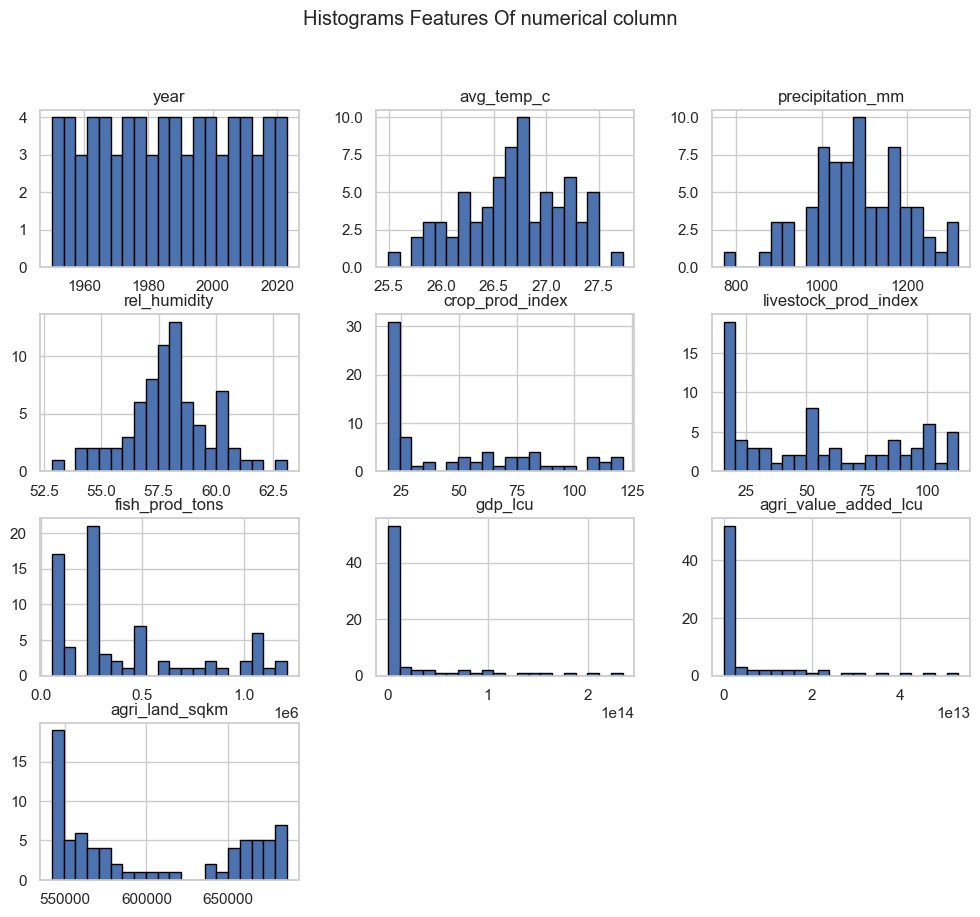

In [6]:
# Plot histograms for all numerical features
cinae_interpolated.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms Features Of numerical column')
plt.show()

**Output Summary:** The histograms provides a visual summary of the distributions over the years 1950-2023. The following are observed:

1. Year: The data is evenly distributed across the years, showing consistent coverage from 1950 to 2023.
 
1. Average Temperature (avg_temp_c): The histogram shows a normal distribution centered around 26.7°C, indicating that most years had temperatures close to this value, with fewer years having significantly higher or lower temperatures.
 
1. Precipitation (precipitation_mm): The distribution is skewed slightly to the right, with most years experiencing precipitation between 1000 mm and 1200 mm, but some years recorded significantly higher or lower values.
 
1. Relative Humidity (rel_humidity): The relative humidity is tightly clustered around 57.5% to 58.5%, showing little variation over the years.
 
1. Crop Production Index (crop_prod_index): This index shows a positively skewed distribution with many low values, indicating that the crop production index has increased significantly in recent years.
 
1. Livestock Production Index (livestock_prod_index): Similar to the crop production index, this also shows a right-skewed distribution, with a significant number of years having low values, suggesting an upward trend over time.
 
1. Fish Production (fish_prod_tons): The distribution shows a broad range with a peak at lower production levels and a few instances of very high production, indicating considerable variability.
 
1. GDP (gdp_lcu): The GDP in local currency units shows a heavily skewed distribution with most values clustered at the lower end and a few years with exceptionally high GDP, reflecting economic growth over time.
 
1. Agricultural Value Added (agri_value_added_lcu): This also has a skewed distribution with most values being low, but a few instances where agricultural value added was significantly higher, indicating growth in agricultural contributions to the economy.
 
1. Agricultural Land (agri_land_sqkm): The distribution shows that most values are concentrated around 600,000 square kilometers, with some variation but generally stable land use for agriculture over the years.

These histograms collectively suggest that while temperature and humidity have been relatively stable, other variables like precipitation, agricultural indices, GDP, and agricultural value added have shown significant variability and growth over time, reflecting changes in environmental and economic conditions.

# Correlation Analysis
Examining the correlation between different variables using a heatmap.


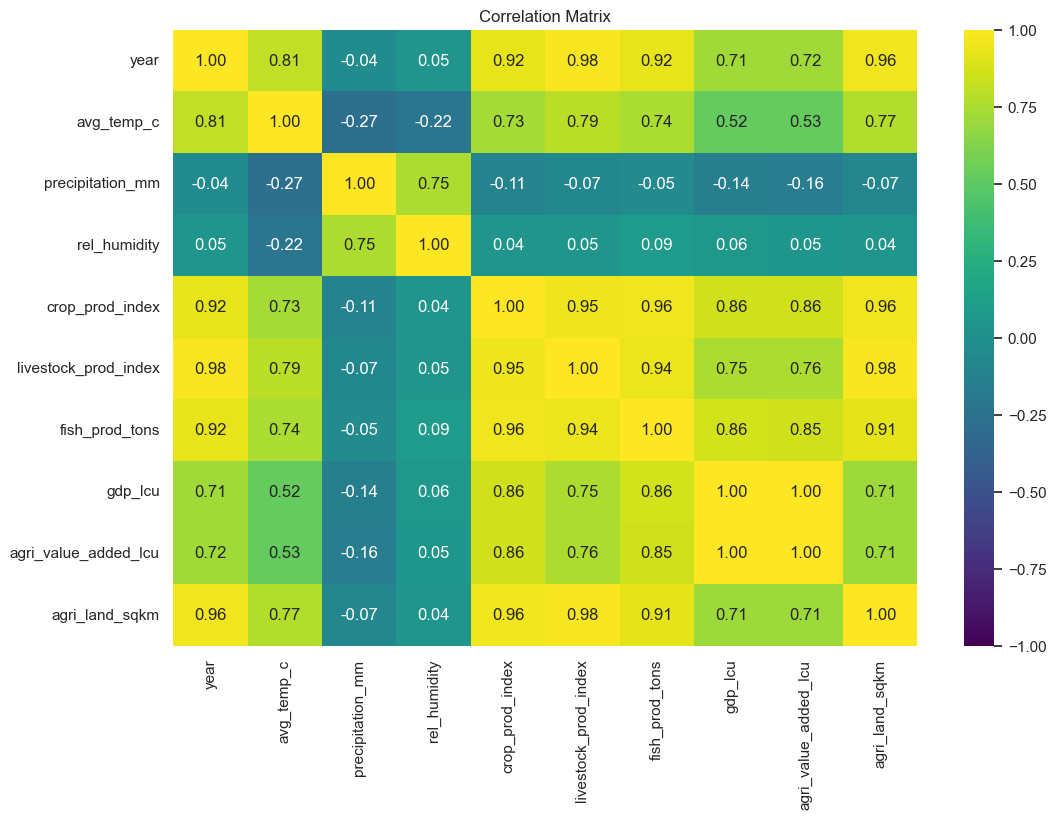

In [7]:
# Compute the correlation matrix
correlation_matrix = cinae_interpolated.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Checking for Trends Over Time

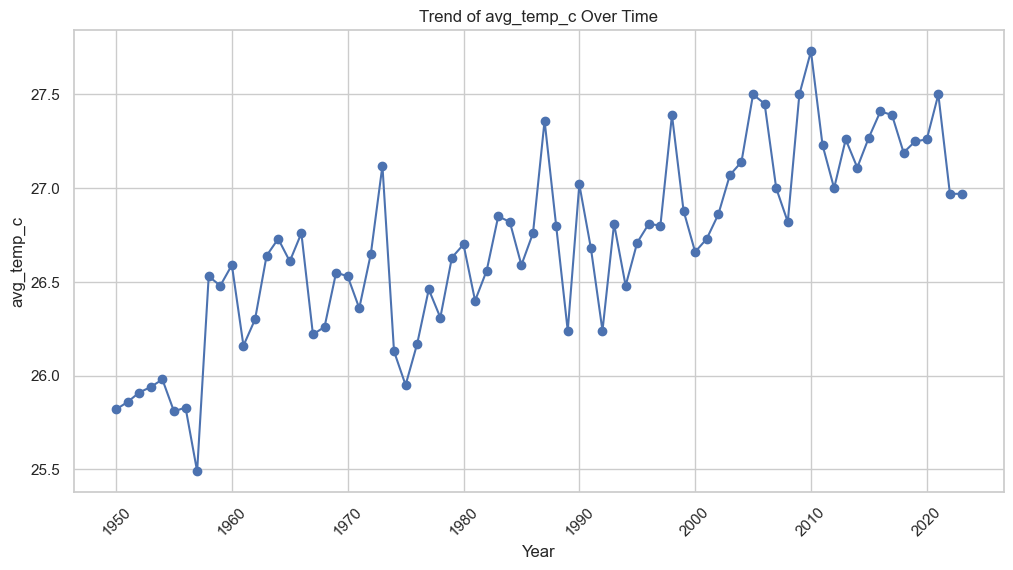

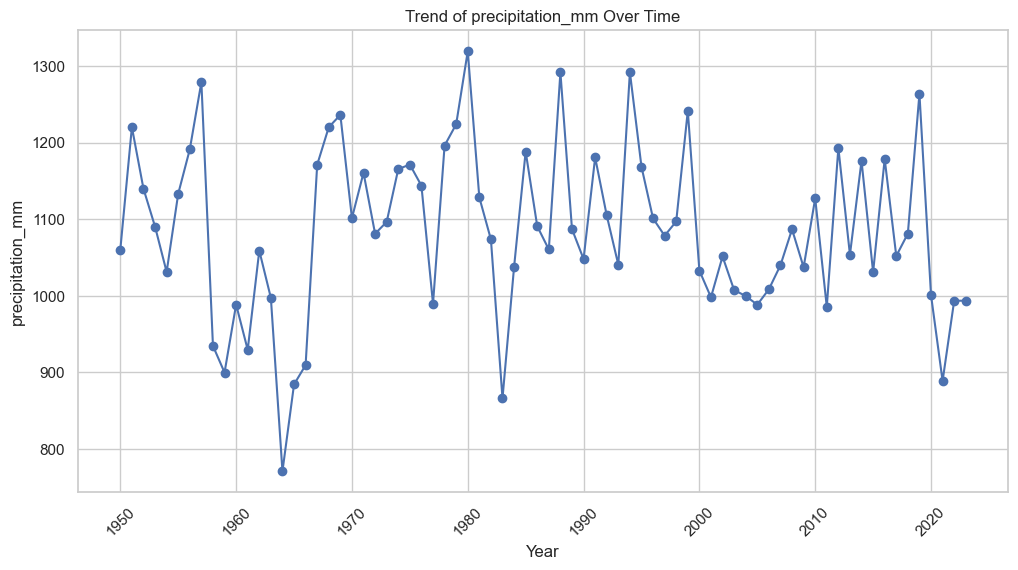

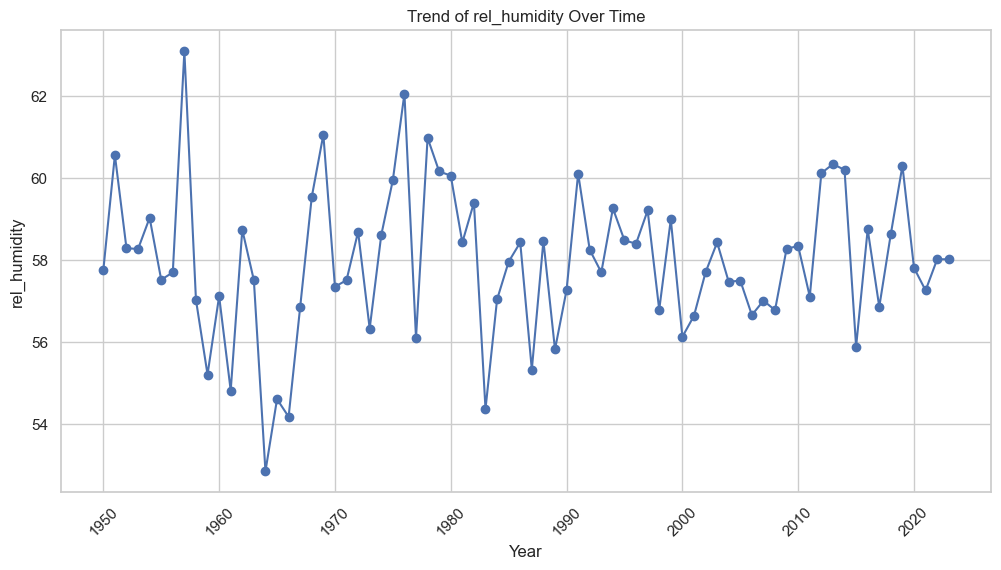

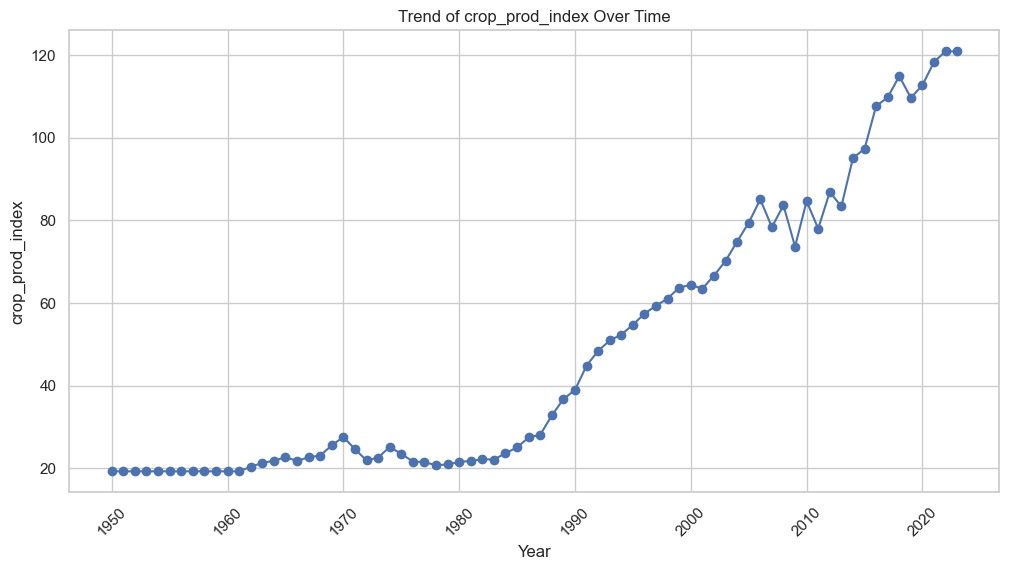

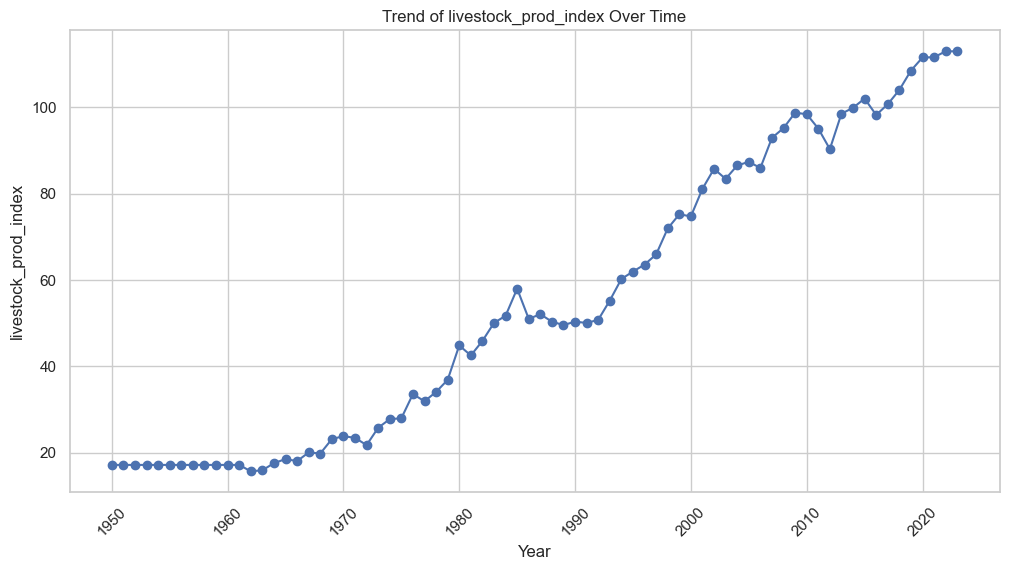

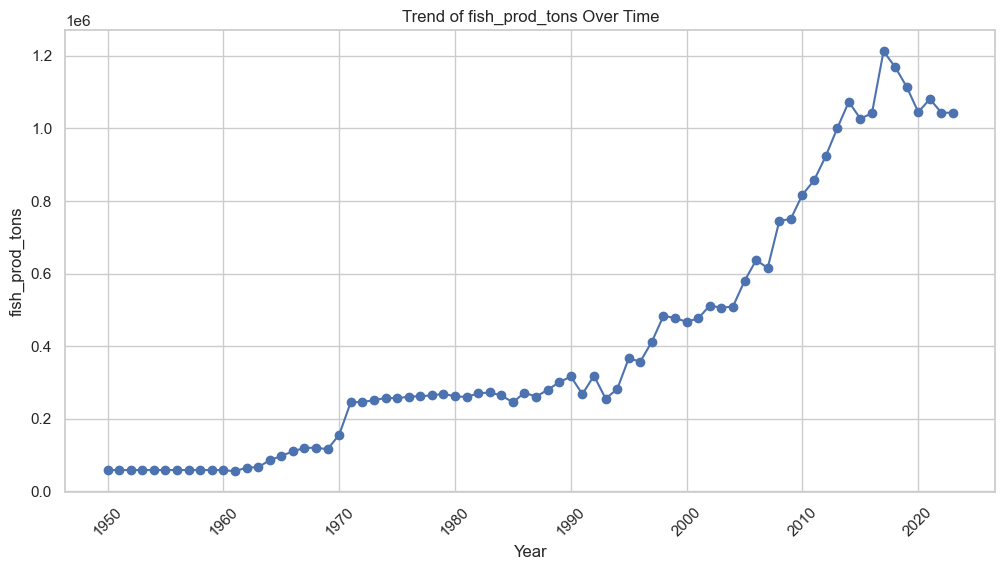

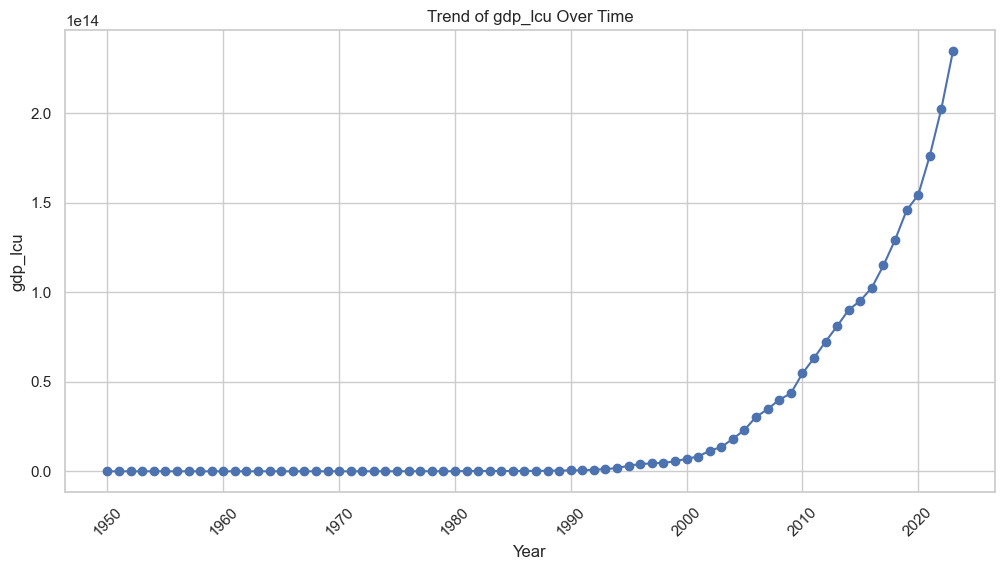

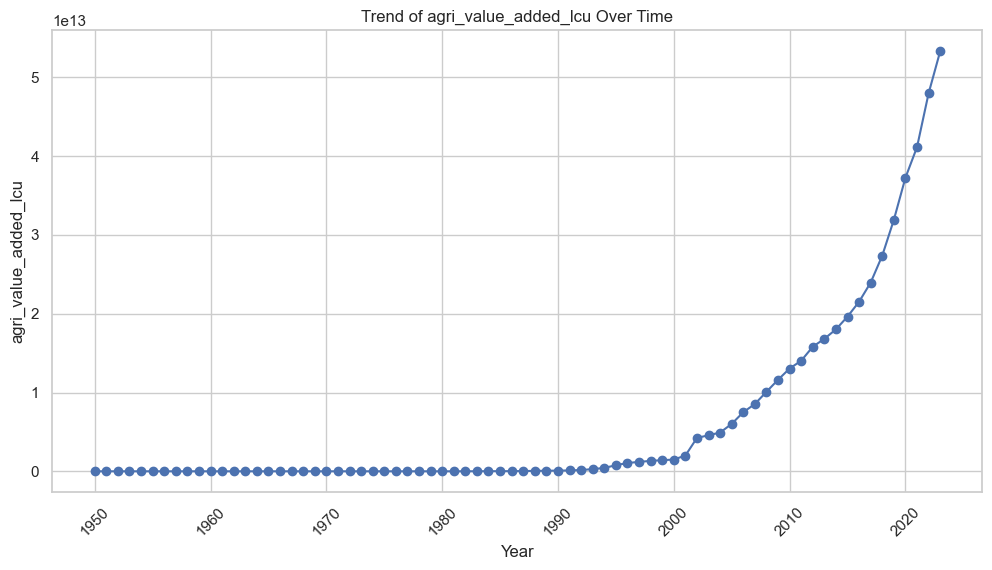

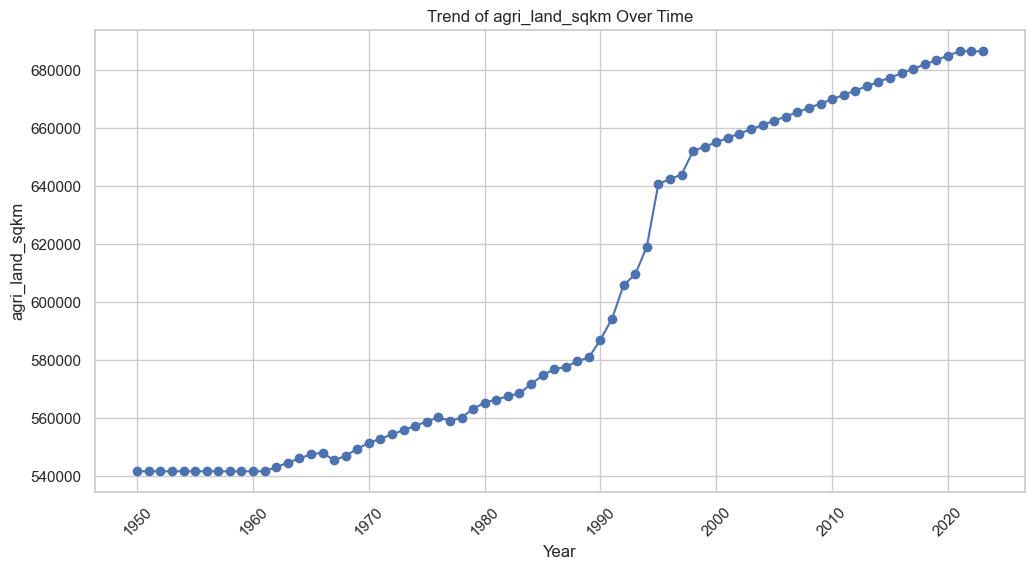

In [8]:
def plot_trend(cinae_interpolated, column, date_column='year'):
    plt.figure(figsize=(12, 6))
    plt.plot(cinae_interpolated[date_column], cinae_interpolated[column], marker='o')
    plt.title(f'Trend of {column} Over Time')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# List of columns to plot
columns_to_plot = [
    'avg_temp_c', 
    'precipitation_mm', 
    'rel_humidity', 
    'crop_prod_index', 
    'livestock_prod_index', 
    'fish_prod_tons', 
    'gdp_lcu', 
    'agri_value_added_lcu', 
    'agri_land_sqkm'
]

# Generate plots for each column
for column in columns_to_plot:
    plot_trend(cinae_interpolated, column)

# Multiple Linear Regression
This section explores the impact of weather variables on crop production using Multiple Linear Regression, evaluating the model's performance with metrics such as Mean Squared Error and R² Score.


In [9]:
#Multiple Linear Regression
# Independent variables (avg_temp_c, precipitation_mm, rel_humidity)
X = cinae_interpolated[['avg_temp_c', 'precipitation_mm', 'rel_humidity']]

# Dependent variable (crop production index)
y = cinae_interpolated['crop_prod_index']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:2f}')
print(f'Rsquare Score: {r2:2f}')


Mean Squared Error: 504.659347
Rsquare Score: 0.541830


**Output Summary:** 

The Mean Squared Error measures the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower Mean Squared Error indicates a better fit of the model to the data. In this case, an MSE of 504.66 means that, on average, the squared difference between the predicted and actual crop production values is 504.66. 

The R² score (or coefficient of determination) represents the proportion of the variance in the dependent variable (crop production) that is predictable from the independent variables (weather variables). An R² score of 0.54 indicates that the weather variables included in the model can explain approximately 54% of the variability in crop production. Conversely, about 46% of the variability is due to factors not included in the model or inherent randomness.

# ARIMA Model for Forecasting Crop Production Index 
Here, we use ARIMA to forecast the Crop Production Index, providing a future outlook based on historical data.


                               SARIMAX Results                                
Dep. Variable:        crop_prod_index   No. Observations:                   74
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -176.937
Date:                Mon, 07 Oct 2024   AIC                            365.874
Time:                        22:31:37   BIC                            379.617
Sample:                             0   HQIC                           371.351
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0450      0.114      0.395      0.693      -0.178       0.268
ar.L2          0.5347      0.082      6.535      0.000       0.374       0.695
ar.L3         -0.2636      0.153     -1.726      0.0

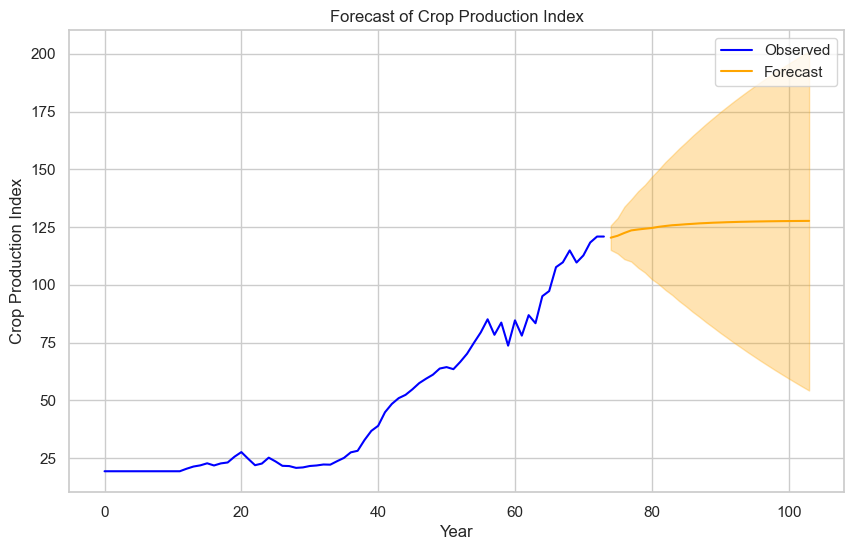

In [13]:

# Fit ARIMA model
#using our target column which is crop prod index 
series = cinae_interpolated['crop_prod_index']
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Generate forecast
forecast = model_fit.get_forecast(steps=30)  # Change steps as needed
forecast_index = range(series.index[-1] + 1, series.index[-1] + 1 + 30)  # Adjust if year indices

# Confidence intervals
conf_int = forecast.conf_int()

# Plot the original series
plt.figure(figsize=(10, 6))
plt.plot(series, label='Observed', color='blue')

# Plot forecast
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)

plt.title('Forecast of Crop Production Index')
plt.xlabel('Year')
plt.ylabel('Crop Production Index')
plt.legend()
plt.show()


**Output Summary:**

**1. Model Fit:**
The ARIMA(5, 1, 0) model incorporates five lags in the autoregressive component, suggesting that past values of the Crop Production Index up to five periods influence the current value. The model uses differencing to ensure stationarity (d=1) and does not include a moving average component (q=0).

**2. Significant Coefficients:**
AR.L2 and AR.L4 are statistically significant, with p-values < 0.05, indicating their substantial impact on the Crop Production Index.
AR.L3 and AR.L5 are marginally significant, suggesting that while their influence is less clear, they might still contribute to the model.

**3. Model Diagnostics:**
Ljung-Box Test: The residuals appear to be independent, as indicated by the high p-value (0.77), suggesting that the model has captured the time series patterns effectively.
Jarque-Bera Test: The low p-value indicates that the residuals are not normally distributed, which could be a concern for model assumptions.
Heteroskedasticity: The presence of heteroskedasticity suggests that the variance of residuals changes over time, potentially indicating that the model might not fully capture all volatility patterns.

**4. Variance of Residuals (sigma2):**
The variance of residuals is significant, indicating that the model's errors are large and variable, which might impact the forecasting accuracy.

# Vector Autoregression (VAR) Model
The VAR model captures the interdependencies among the variables. We adjust the maxlags parameter to avoid estimation errors due to insufficient data points.

In [ ]:
# Select the variables
cinae_var = cinae_interpolated[['avg_temp_c', 'precipitation_mm', 'crop_prod_index', 'gdp_lcu']]

# Fit the VAR model with a reduced number of lags
model = VAR(cinae_var)
model_fitted = model.fit(maxlags=5, ic='aic')  # Reduced maxlags to 5

# Summary of the model
print(model_fitted.summary())

# Forecast
forecast_input = cinae_var.values[-model_fitted.k_ar:]
forecast = model_fitted.forecast(y=forecast_input, steps=5)

# Convert forecast to DataFrame
cinae_forecast = pd.DataFrame(forecast, index=['Forecasted_Year_1', 'Forecasted_Year_2', 'Forecasted_Year_3', 'Forecasted_Year_4', 'Forecasted_Year_5'], columns=cinae_var.columns)
display(cinae_forecast)


**Output Summary:**

The VAR model captures the interdependencies among multiple time series variables, including avg_temp_c, precipitation_mm, crop_prod_index, and gdp_lcu. Here’s a summary of the model's performance and findings:

**Model Overview:**
The VAR model consists of four equations—one for each variable—and is based on 70 observations. The Log Likelihood is -2642.85, with Akaike Information Criterion (AIC) at 66.1014, Bayesian Information Criterion (BIC) at 68.2856, and Hannan-Quinn Information Criterion (HQIC) at 66.9690. The Final Prediction Error (FPE) is 5.30472e+28, and the determinant of the model's covariance matrix (Det(Omega_mle)) is 2.22319e+28. These metrics help gauge the model’s fit and complexity.

**Results for Each Equation:**

**Equation for avg_temp_c:** The lagged average temperature significantly affects the current temperature, with L1.avg_temp_c (0.503, p-value = 0.001) showing a strong impact. L3.avg_temp_c (0.328, p-value = 0.064) is marginally significant. However, lagged values of precipitation_mm, crop_prod_index, and gdp_lcu do not significantly influence avg_temp_c.

**Equation for precipitation_mm:** Lagged precipitation (L1.precipitation_mm: 0.493, p-value = 0.001) significantly impacts current precipitation. In contrast, lagged values of avg_temp_c, crop_prod_index, and gdp_lcu do not show significant effects.

**Equation for crop_prod_index:** Significant effects are noted for L1.avg_temp_c (2.491, p-value = 0.025), L1.crop_prod_index (1.123, p-value = 0.000), and L1.gdp_lcu (-0.000, p-value = 0.000), indicating strong autocorrelation and influence on crop production. L2.crop_prod_index (0.392, p-value = 0.011) also has a significant effect. Other lagged variables do not significantly impact the crop production index.

**Equation for gdp_lcu:** Lagged GDP values significantly affect themselves, with L1.gdp_lcu (1.249, p-value = 0.000) and L3.gdp_lcu (-0.647, p-value = 0.017) showing significant impacts. Other variables, including lagged avg_temp_c, precipitation_mm, and crop_prod_index, do not significantly affect GDP.

**Residual Analysis:**
The correlation matrix of residuals reveals that residuals for avg_temp_c and precipitation_mm have a negative correlation, while residuals for crop_prod_index and gdp_lcu exhibit weak correlations. This suggests some degree of interdependence among the residuals.

**Forecasted Values:**
The model forecasts future values for avg_temp_c, precipitation_mm, crop_prod_index, and gdp_lcu over the next five years. For instance, avg_temp_c is expected to remain relatively stable, while the crop production index shows an increasing trend.


The VAR model effectively captures the dynamic relationships among the variables, although some coefficients are not statistically significant. Significant impacts of lagged values on each variable suggest that historical data plays a crucial role in current values. The forecasting component provides valuable insights for future planning.

### Conclusion

This analysis of Nigeria's agricultural and economic indicators from 1950 to 2023 has provided valuable insights into the interplay between weather variables and key economic metrics. By leveraging multiple analytical techniques, including Multiple Linear Regression, ARIMA, and Vector Autoregression (VAR), we have examined the complex relationships between climate conditions and agricultural productivity.

**Key Findings:**

1. **Weather Variables Impact:** Our regression analysis demonstrated that weather variables such as average temperature, precipitation, and relative humidity have a moderate impact on crop production. The model explains about 54% of the variance in crop production, highlighting the influence of these climatic factors on agricultural output.

2. **Forecasting Trends:** The ARIMA model, used to forecast the Crop Production Index, indicates future trends based on historical data. While the model provides a useful outlook, it also reveals variability in the residuals, suggesting that future predictions should account for potential uncertainties and evolving climate patterns.

3. **Interdependencies Among Variables:** The VAR model illustrated the interconnected nature of weather conditions, crop production, and economic indicators like GDP. The model’s forecasts offer a glimpse into how changes in these variables might influence each other over the coming years.


The data and models employed in this analysis underscore the significance of climate variables in shaping Nigeria’s agricultural sector and economic performance. The findings suggest that while some climatic factors have a clear influence on agricultural output, other elements such as economic policies and technological advancements also play crucial roles. Continuous monitoring and modeling of these factors are essential for developing strategies to enhance agricultural productivity and economic growth in the face of changing climate conditions.

Moving forward, further research could expand on these models by incorporating additional variables and more granular data to refine predictions and better understand the nuanced impacts of climate change on Nigeria's economy and agriculture.